## Imports

In [11]:
#Imports
import pandas as pd
import numpy as np
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

**From the instructions**

Vision: Programming is more than writing code. The ultimate goal of the projects in this course
is that you learn to formulate a programming problem of your own choice, and find your own way
to solve it, and present the results. The bullets below are minimum requirements, but otherwise it is
very much up to you, what you will like to do with your project. I hope to see some creative ideas!

• Objectives: In your model analysis project, you should show that you can:
1. Apply model analysis methods (e.g. scipy.optimize, scipy.linalg, sympy)
2. Structure a code project
3. Document code
4. Present results in text form and in figures

• Content: In your model analysis project, you should at a minimum:
1. Describe an algorithm on how to solve a simple economic model (most likely taken from a textbook)
2. Solve (and perhaps simulate) a simple economic model
3. Visualize results across e.g. parametrizations
4. Analyze one or more extensions of the baseline model

• Structure: Your data analysis project should consist of:
1. A README.md with a short introduction to your project
2. A single self-contained notebook (.ipynb) presenting the analysis
3. (Optionally) Fully documented Python files (.py)
• Size: Quality before quantity.
• Hand-in: On GitHub by uploading it to the folder:
github.com/projects-2019-YOURGROUPNAME/modelproject/
• Deadline: 10th of May 23.59
• Supervision: The exercises class in the weeks starting 29th of April and 6th of May will
give you time to work on your model project and receive supervision from the lecturer and the
teaching assistants. Also, remember the online forum.
• Peer feedback: After handing in, you will be asked to give peer feedback on the projects of
two other groups.
• Exam: Your model analysis project will be a part of your exam portfolio. You are free to
incorporate the peer feedback and other comments before handing in the final version.

### Overview of our project

**Overall subject**: Auction theory

Specifically, we want to numerically solve different of the standard auction models that we can solve analytically - e.g. first-price auctions with symmetric bidders with uniformly distributed valuations. We want to this, so we can check the numerical solution vs. analytical solution.

We might also try to investigate if we can solve some of the models, which become very cumbersome analytically - e.g. for non-uniform distribtions.

We could start off in the universe off (where we have analytical solutions) - e.g.:

1. 1st-price auctions with $N$ symmetric bidders with private valuations from $U[a,b]$
1. 2nd-price auctions with $N$ symmetric bidders with private valuations from $U[a,b]$
1. kth-price auctions with $N$ symmetric bidders with private valuations from $U[a,b]$

Ideally, we should be able to show:

1. Bidding strategies for individual bidders for given parameterizations and formats
1. Expected revenue for the auctioneer for given parameterizations and formats
1. Actual revenue (thus, also bids) for simulations

##### Draw relevant parameters

In [228]:
n = 3 # Number of bidders
a = 0
b = 1
all_valuations = np.random.uniform(a,b, n)
valuation = all_valuations[1] # Valuation
max_valuation = max(all_valuations) # max bid

#### Initial functions (move to .py file later)

##### Find kth highest bid

In [229]:
def k_highest_bid(k, all_valuations):
    return round(sorted(all_valuations, reverse = True)[k-1], 3)

##### Payoff from participating in auction

In [230]:
def payoff(bid, highest_bid, k_highest_bid):
    if bid == highest_bid: 
        return round((valuation - k_highest_bid), 3)
    else: 
        return 0

##### Optimal bidding strategies

In [231]:
def opt_bid_1_price_uniform(a, n, valuation):
    return round(a + ((n-1)/n)*(valuation-a), 3)

In [232]:
def opt_bid_2_price(valuation):
    return round(valuation, 3)

### 1st price auction (highest bid wins and pays the highest bid)

##### Optimal bidding strategy

Optimal to shade your bid. 
Bid your expectation of the second highest value conditional on winning


\begin{equation}
\beta^{I^*} = E(Y_1|Y_1 < x)
\end{equation}

In [233]:
opt_bid_1_price_uniform(a = a, n = n, valuation = valuation)

0.284

##### Payoff

##### Expected Revenue

##### Actual Revenue

### 2nd price auction (highest bid wins and pays the second highest bid)

##### Optimal bidding strategy

The optimal bidding strategy in a second price auction is to bid your valuation

\begin{equation}
\beta^{II^*} = x
\end{equation}

In [234]:
bid = opt_bid_2_price(valuation = valuation)
bid

0.427

In [235]:
highest_bid = k_highest_bid(k = 1, all_valuations = all_valuations)
highest_bid

0.427

In [236]:
second_highest_bid = k_highest_bid(k = 2, all_valuations = all_valuations)
second_highest_bid 

0.353

##### Payoff

In [237]:
payoff(bid = bid, highest_bid = highest_bid, k_highest_bid = second_highest_bid)

0.074

##### Expected Revenue

##### Actual Revenue 

### kth-price auction (highest bid wins and pays the kth highest bid)

##### Optimal bidding strategy

...





### Optimal bidding strategy plot

In [238]:
number_of_bidders = list(range(1,30))
df = pd.DataFrame(number_of_bidders)
df = df.rename(index=str, columns={0: "N bidders"})
df['Optimal bid 1st price'] = opt_bid_1_price_uniform(a = a, n = df['N bidders'], valuation = valuation)
df['Optimal bid 2nd price'] = valuation
df.head()

,N bidders,Optimal bid 1st price,Optimal bid 2nd price
0,1,0.000,0.426604
1,2,0.213,0.426604
2,3,0.284,0.426604
3,4,0.320,0.426604
4,5,0.341,0.426604


Text(0.5, 1.0, 'Optimal bidding strategy by number of bidders')

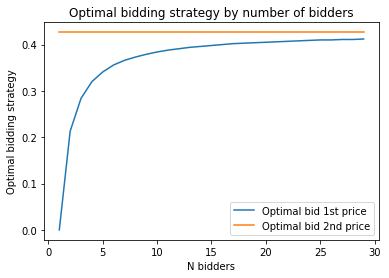

In [239]:
df.plot(x = 'N bidders')
plt.ylabel('Optimal bidding strategy')
plt.title('Optimal bidding strategy by number of bidders')

From the plot above, you can see how the optimal bidding strategy depend on the number of bidders for different auction formats. 
1. First price auction: With a higher number of bidders in the auction the less you should shade your bid. 
1. Second price auction: does not depend on number of bidders, but only on own valuation 
